# Coronavirus data - regression with logistic function and Random Forest


In [2]:
%matplotlib inline
# not important: disable matplotlib warning for a cleaner look
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit


In [3]:
# download file: 

import requests

url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx'
r = requests.get(url, allow_redirects=True)

open('COVID-19-geographic-disbtribution-worldwide-today.xls', 'wb').write(r.content)

 

3587137

# read data

In [4]:
df = pd.read_excel("COVID-19-geographic-disbtribution-worldwide-today.xls", 
                  names=['DateRep', 'Day', 'Month', 'Year', 'Cases', 'Deaths',
       'Countries and territories', 'GeoId', 'countryterritoryCode','popData2018', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'])
df

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,countryterritoryCode,popData2018,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
...,...,...,...,...,...,...,...,...,...,...,...,...
61895,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61896,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61897,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61898,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


# explore data

In [5]:
df.groupby("Countries and territories")["Cases"].sum()

Countries and territories
Afghanistan          49273
Albania              48530
Algeria              92102
Andorra               7338
Angola               16188
                     ...  
Wallis_and_Futuna        3
Western_Sahara         766
Yemen                 2083
Zambia               18274
Zimbabwe             11246
Name: Cases, Length: 214, dtype: int64

In [6]:
df[df["Countries and territories"]=="United_States_of_America"]

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,countryterritoryCode,popData2018,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
59001,2020-12-14,14,12,2020,189723,1340,United_States_of_America,US,USA,329064917.0,America,873.211592
59002,2020-12-13,13,12,2020,216017,2315,United_States_of_America,US,USA,329064917.0,America,857.089241
59003,2020-12-12,12,12,2020,234633,3343,United_States_of_America,US,USA,329064917.0,America,838.514183
59004,2020-12-11,11,12,2020,224680,2748,United_States_of_America,US,USA,329064917.0,America,830.394205
59005,2020-12-10,10,12,2020,220025,3124,United_States_of_America,US,USA,329064917.0,America,794.356027
...,...,...,...,...,...,...,...,...,...,...,...,...
59346,2020-01-04,4,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,NaN
59347,2020-01-03,3,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,NaN
59348,2020-01-02,2,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,NaN
59349,2020-01-01,1,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,NaN


In [8]:
df[df["DateRep"]=="2020-12-14"].sort_values(by=['Cases'], ascending=False)[:50]

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,countryterritoryCode,popData2018,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
59001,2020-12-14,14,12,2020,189723,1340,United_States_of_America,US,USA,3.290649e+08,America,873.211592
56949,2020-12-14,14,12,2020,29136,222,Turkey,TR,TUR,8.200388e+07,Europe,499.220269
46919,2020-12-14,14,12,2020,28080,488,Russia,RU,RUS,1.458723e+08,Europe,263.663564
26745,2020-12-14,14,12,2020,27071,336,India,IN,IND,1.366418e+09,Asia,33.109128
7991,2020-12-14,14,12,2020,21825,279,Brazil,BR,BRA,2.110495e+08,America,278.234228
58378,2020-12-14,14,12,2020,18447,144,United_Kingdom,UK,GBR,6.664711e+07,Europe,348.216139
29099,2020-12-14,14,12,2020,17937,484,Italy,IT,ITA,6.035955e+07,Europe,428.323301
21880,2020-12-14,14,12,2020,16362,188,Germany,DE,DEU,8.301921e+07,Europe,341.136696
57758,2020-12-14,14,12,2020,15627,249,Ukraine,UA,UKR,4.399364e+07,Europe,404.574361
20364,2020-12-14,14,12,2020,11533,150,France,FR,FRA,6.701288e+07,Europe,236.326200


# visual explore

In [14]:
# logistic function
from scipy.stats import logistic

def logistic_dNdt(t, norm, tpeak, width):
    return logistic.pdf(t, tpeak, width) * norm


# multiple logistics 
def N_logistics(t, *pars):
    #pars should contain list of [norm, tpeak, width] s
    # e.g., [[norm, tpeak, width], [norm, tpeak, width], [norm, tpeak, width]]
    out = np.zeros_like(t)
    #print(pars)
    #pars = pars[0]
    #print(len(t), len(out), len(pars))
    pars = np.reshape(pars, (len(pars)//3, 3))

    for ps_ in pars: 
        out = out + logistic.pdf(t, ps_[1], ps_[2]) * ps_[0]
    return out

# exponential 

def exp(t, norm, t0, trise):
    return norm*np.exp((t-t0)/trise)


import scipy
from scipy.optimize import curve_fit

def chisq(y_vals, y_expected, y_errs, num_params=1):
    #returns chi2, dof, red_chi2
    #  for reduced chisq test, under the assumption of Poisson counting
    #  we have lnL = const - (1/2.)*chi2
    if y_vals.shape[0] != y_expected.shape[0]:
        print("Inconsistent input sizes")
        return
    #z = (y_vals[i] - y_expected[i]) / y_errs[i]    
    z = (y_vals - y_expected) / y_errs
    chi2 = np.sum(z ** 2)
    chi2dof = chi2 / (y_vals.shape[0] - num_params)
    return chi2, (y_vals.shape[0] - num_params), chi2dof


def fit_factory_boundMC(model, x, y, dy=None, p0=[1.2e-11, -3.6], Nsim=500, plotEs=None):
    if dy is not None:
        paramsPLlog, covariacesPLlog = curve_fit(model, x,
                                           y, p0=p0,
                                           sigma=dy, 
                                             absolute_sigma=True) #approx abs
    else:
        paramsPLlog, covariacesPLlog = curve_fit(model, x,
                                           y, p0=p0)
        
    for i in range(len(p0)):
        print("best-fit param %d = %.4g +/- %.4g" % (i, paramsPLlog[i], np.sqrt(abs(covariacesPLlog[i,i]))))

    
    # Use some MC
    #print(type(x), x)
    #print(float(x[0]), float(x[-1]))
    if plotEs is not None: 
        x_values = plotEs
    else:
        x_values = np.logspace(np.log10(float(x[0])), np.log10(float(x[-1])), 100)
    rng = np.random.RandomState(seed=76)
    parameter_samples = rng.multivariate_normal(paramsPLlog, covariacesPLlog, Nsim)
    #print(paramsPLlog, covariacesPLlog)
    
    #print(parameter_samples.shape)
    realizations = np.array([model(x_values, *pars) for pars in parameter_samples])

    qlo = 100 * scipy.stats.norm.cdf(-1)    #1 is the 1 sigma
    y_low = np.percentile(realizations, qlo, axis=0)
    qhi = 100 * scipy.stats.norm.cdf(1)     #1 is the 1 sigma
    y_high = np.percentile(realizations, qhi, axis=0)
    
    #print(y_low.shape)
    
    return paramsPLlog, np.diag(covariacesPLlog)**0.5, x_values, y_low, y_high





Text(0, 0.5, 'Daily New Cases')

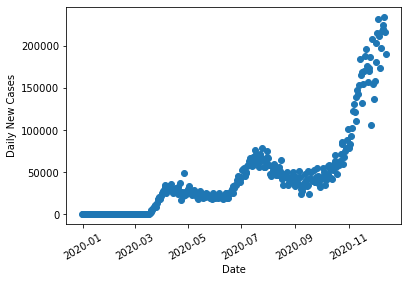

In [12]:
dfus = df[df["Countries and territories"]=="United_States_of_America"]

fig, ax = plt.subplots()

#plot
plt.plot(dfus["DateRep"], dfus["Cases"], marker="o", ls="")


#set tick labels
plt.xticks(rotation=30)

#set axis labels
plt.xlabel("Date")
plt.ylabel("Daily New Cases")


In [13]:
def check_country(country="China", model=logistic_dNdt, p0=[4000, 35, 5], 
                  blind=0, out_string="COVID_Apr16", 
                  ylog=False, ylim_new=None, ylim_cum=None, 
                  marker='.', linecolor='r'):
    dfch = df[df["Countries and territories"]==country]

    t0ch = dfch["DateRep"].min()
    print("Data start on {}".format(t0ch))
    print("Data end on {}".format(dfch["DateRep"].max()))

    ts_rel_ch = ((dfch["DateRep"]-t0ch)/ np.timedelta64(1, 'D')).values[::-1]
    nums = dfch["Cases"].values[::-1]
    plot_ts = np.arange(0,np.max(ts_rel_ch)+10, 1.0)
    
    if blind > 0: 
        print("Blinding the last {} days".format(blind))
        ts_blind = ts_rel_ch[-blind:]
        nums_blind = nums[-blind:]
        ts_rel_ch = ts_rel_ch[:-blind]
        nums = nums[:-blind]
        print(ts_blind, nums_blind)
        plt.plot(ts_blind, nums_blind, marker=marker, ls="", color='r')        

    plt.plot(ts_rel_ch, nums, marker=marker, ls="")

    #fit
    ps_, dps_, ts_, ylo_, yhi_ = fit_factory_boundMC(model, 
                                                          ts_rel_ch, 
                                                           nums,  
                                                           p0=p0, 
                                                            plotEs=plot_ts)
    model_ = model(plot_ts, *ps_) 
    plt.plot(plot_ts, model_, color=linecolor, ls='--', zorder=99)
    plt.fill_between(ts_,ylo_, yhi_,alpha=0.3,color=linecolor, zorder=99)
    


    if ylog:
        plt.yscale('log')
    if ylim_new is not None: 
        plt.ylim(ylim_new)
        
    #set axis labels
    plt.xlabel("Day since 2019-12-31")
    plt.ylabel("Daily New Cases")

    plt.tight_layout()
    #save plot
    plt.savefig("{}_{}_dailynew.png".format(country, out_string))
    
    #
    plt.figure()
    cumch = np.cumsum(nums)
    plt.plot(ts_rel_ch, cumch, marker=marker, ls="")
    plt.plot(plot_ts, np.cumsum(model_), color=linecolor, ls='--', zorder=99)
    if blind > 0: 
        cum_blind = np.max(cumch)+np.cumsum(nums_blind)
        plt.plot(ts_blind, cum_blind, marker=marker, ls="", color='r')

    

    #set axis labels
    plt.xlabel("Day since 2019-12-31")
    plt.ylabel("Cumulative Number of Cases")
    newtotali = max(cumch)
    
    if ylog:
        plt.yscale('log')
    if ylim_cum is not None: 
        plt.ylim(ylim_cum)
    plt.tight_layout()
    
    for i in range(5):
        ti = np.max(ts_rel_ch)+i+1
        newi = model(ti, *ps_)
        newtotali += newi
        print("day {} from today, expect {} new cases and {} total cases".format(
        i+1,newi, newtotali ))

    #save plot
    plt.savefig("{}_{}_dailysum.png".format(country, out_string))




# 3 logistic functions for 3 waves


Data start on 2019-12-31 00:00:00
Data end on 2020-12-14 00:00:00
best-fit param 0 = 1.514e+06 +/- 1.386e+05
day 1 from today, expect 212113.79099872292 new cases and 16468867.790998723 total cases
day 2 from today, expect 212319.32136314153 new cases and 16681187.112361865 total cases
day 3 from today, expect 212342.0529580909 new cases and 16893529.165319957 total cases
day 4 from today, expect 212181.84565167234 new cases and 17105711.010971628 total cases
day 5 from today, expect 211839.19454738824 new cases and 17317550.205519017 total cases


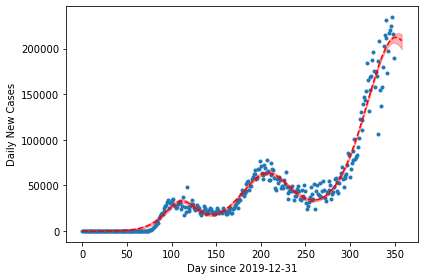

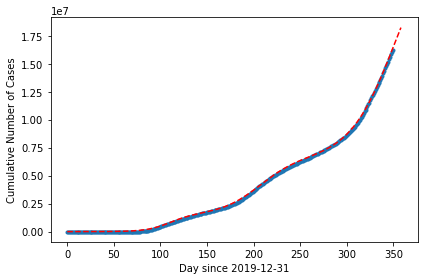

In [15]:
p0=[50000, 100, 20, 75000, 200, 20, 300000, 350, 50]
#pars should contain list of [norm, tpeak, width] s
    
check_country(country="United_States_of_America", model=N_logistics, 
              p0=[p0], out_string="2020Dec16_logistic_model")

# Cannot really predict when will the peak occur

Data start on 2019-12-31 00:00:00
Data end on 2020-12-14 00:00:00
Blinding the last 14 days
[336. 337. 338. 339. 340. 341. 342. 343. 344. 345. 346. 347. 348. 349.] [157903 180421 203311 214747 231930 211933 173432 197334 217344 220025
 224680 234633 216017 189723]
best-fit param 0 = 1.273e+06 +/- 1.251e+05
day 1 from today, expect 166079.1313458037 new cases and 13549400.131345803 total cases
day 2 from today, expect 164487.81701984318 new cases and 13713887.948365645 total cases
day 3 from today, expect 162612.70943403273 new cases and 13876500.657799678 total cases
day 4 from today, expect 160466.90223269194 new cases and 14036967.56003237 total cases
day 5 from today, expect 158065.20351611232 new cases and 14195032.763548482 total cases


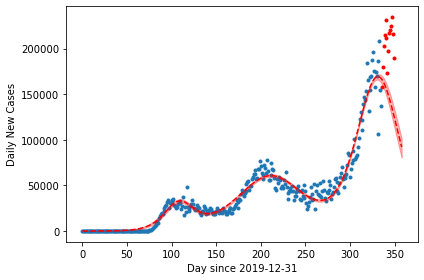

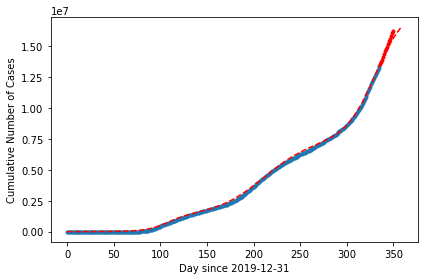

In [16]:
check_country(country="United_States_of_America", model=N_logistics, 
              blind=14,
              p0=[p0], out_string="2020Dec16_logistic_model_blind14days")

# Use a Random forest

In [17]:
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split

from math import sqrt

from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import neighbors

from sklearn.metrics import classification_report,confusion_matrix


In [19]:
def check_country_ML(country="China", model=logistic_dNdt, p0=[4000, 35, 5], 
                  blind=0, out_string="COVID_Apr16", 
                  ylog=False, ylim_new=None, ylim_cum=None, 
                  marker='.', linecolor='r'):
    dfch = df[df["Countries and territories"]==country]

    t0ch = dfch["DateRep"].min()
    print("Data start on {}".format(t0ch))
    print("Data end on {}".format(dfch["DateRep"].max()))

    ts_rel_ch = ((dfch["DateRep"]-t0ch)/ np.timedelta64(1, 'D')).values[::-1]
    nums = dfch["Cases"].values[::-1]
    plot_ts = np.arange(0,np.max(ts_rel_ch)+10, 1.0)
    
    if blind > 0: 
        print("Blinding the last {} days".format(blind))
        ts_blind = ts_rel_ch[-blind:]
        nums_blind = nums[-blind:]
        ts_rel_ch = ts_rel_ch[:-blind]
        nums = nums[:-blind]
        print(ts_blind, nums_blind)
                

    plt.plot(ts_rel_ch, nums, marker=marker, ls='', label="Data")
    
    X = np.expand_dims(ts_rel_ch, axis=1)
    y = np.expand_dims(nums, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
    print(X_train.shape); print(X_test.shape)

    #model = MLPRegressor(hidden_layer_sizes=(8,8,8), activation='identity', solver='adam', 
    #                   learning_rate='adaptive', max_iter=5000)
    
    #model = DecisionTreeRegressor(max_depth=12, min_samples_leaf=0.1, random_state=3)

    #RF model
    model = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)

    # SVM
    #model = SVR()
    
    # kNN
    #model = neighbors.KNeighborsRegressor(3, weights="distance")

    
    model.fit(X_train,y_train)

    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)

    print(np.sqrt(mean_squared_error(y_train, predict_train)))
    print(r2_score(y_train, predict_train))

    print(np.sqrt(mean_squared_error(y_test,predict_test))) 
    print(r2_score(y_test, predict_test))

    #print(confusion_matrix(y_train,predict_train))
    #print(classification_report(y_train,predict_train))
    plt.plot(X_train, predict_train, label="Train", marker='.', alpha=0.6, ls="")
    plt.plot(X_test, predict_test, label="Test", marker='.', alpha=0.6, ls="")
    
    if blind > 0:
        plt.plot(ts_blind, nums_blind, marker=marker, ls="", color='r', label="Masked data")
        x_future = np.expand_dims(ts_blind, axis=1)
        predict_future = model.predict(x_future)
        plt.plot(x_future, predict_future, label="Prredict", marker='.', color='m', alpha=0.6, ls="")

    """#fit
    ps_, dps_, ts_, ylo_, yhi_ = fit_factory_boundMC(model, 
                                                          ts_rel_ch, 
                                                           nums,  
                                                           p0=p0, 
                                                            plotEs=plot_ts)
    model_ = model(plot_ts, *ps_) 
    plt.plot(plot_ts, model_, color=linecolor, ls='--', zorder=99)
    plt.fill_between(ts_,ylo_, yhi_,alpha=0.3,color=linecolor, zorder=99)
    """


    if ylog:
        plt.yscale('log')
    if ylim_new is not None: 
        plt.ylim(ylim_new)
        
    #set axis labels
    plt.xlabel("Day since 2019-12-31")
    plt.ylabel("Daily New Cases")
    plt.legend()
    
    plt.tight_layout()
    #save plot
    plt.savefig("{}_{}_dailynew_ML.png".format(country, out_string))
    
    #
    plt.figure()

    


Data start on 2019-12-31 00:00:00
Data end on 2020-12-14 00:00:00
(245, 1)
(105, 1)
4079.1071385757537
0.9940054143174402
10659.602888069352
0.9532067223956358


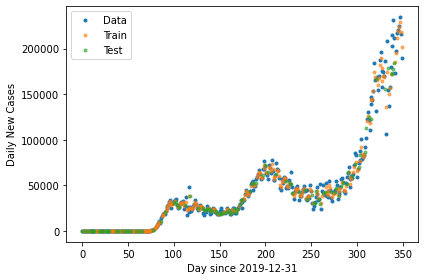

<Figure size 432x288 with 0 Axes>

In [21]:
check_country_ML(country="United_States_of_America", model=N_logistics, 
              p0=[p0], out_string="2020Dec14_RandomForest_model")

# Random Forest cannot predict the peak either
* try LSTM and RNN

Data start on 2019-12-31 00:00:00
Data end on 2020-12-14 00:00:00
Blinding the last 30 days
[320. 321. 322. 323. 324. 325. 326. 327. 328. 329. 330. 331. 332. 333.
 334. 335. 336. 337. 338. 339. 340. 341. 342. 343. 344. 345. 346. 347.
 348. 349.] [165277 132170 168425 154316 170005 188020 196117 175494 157471 173963
 170293 186589 106091 207913 154893 136670 157903 180421 203311 214747
 231930 211933 173432 197334 217344 220025 224680 234633 216017 189723]
(224, 1)
(96, 1)
2405.2874965915566
0.9939133811280958
5820.832829594501
0.957756956489756


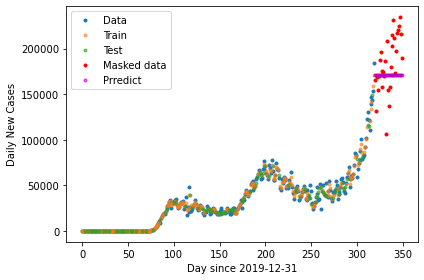

<Figure size 432x288 with 0 Axes>

In [20]:
check_country_ML(country="United_States_of_America", model=N_logistics, 
              blind=30,
              p0=[p0], out_string="2020Dec14_RandomForest_model_blind30days")